In [1]:
# python -m pip install prophet
# here i will try prophet on the loged data so log(x)

In [66]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date
from prophet import Prophet

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

# facebook prophet requires the data to be in 2 colums named ds and y
# ds will be a datetime column with no timezone data and y the label we are forecasting
# ds must NOT be an index like other machine learning algorithms
dfBTCActual = pd.read_csv('./data/BTC-USD.csv')
dfBTC = pd.read_csv('./data/btc-usd-max.csv')
dfBTC.drop(["market_cap", "total_volume"], axis=1, inplace=True)
dfBTC['price'].fillna(method='ffill', inplace=True)
dfBTC.columns = ['ds','y']
# log data for btc
# dfBTC['y'] = np.log(dfBTC['y'])
# dfBTC['y'].iplot();

In [67]:
# exp(log) = x so the orginal data  data for btc
#dfBTC['y'] = np.exp(dfBTC['y'])
dfBTC['y'].iplot();

In [68]:
# log data for btc
#dfBTC['y'] = np.log(dfBTC['y'])

In [69]:
dfBTC['ds'] = pd.to_datetime(dfBTC['ds'])
dfBTC['ds'] = dfBTC['ds'].dt.tz_localize(None)

In [70]:
dfBTC.head()

,ds,y
0,2013-04-28,135.30
1,2013-04-29,141.96
2,2013-04-30,135.30
3,2013-05-01,117.00
4,2013-05-02,103.43


In [71]:
dfBTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3432 entries, 0 to 3431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3432 non-null   datetime64[ns]
 1   y       3432 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.8 KB


In [72]:
train = dfBTC.iloc[:-365]
test = dfBTC.iloc[-365:]

In [73]:
# This is fitting only on the training data
m = Prophet(weekly_seasonality=False, seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1460, fourier_order=10)
m.fit(train)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=365,freq = 'D')

# to make predictions 
forecast = m.predict(future)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [74]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,4-year,4-year_lower,4-year_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-04-28,34.544315,-1160.643271,1413.182492,34.544315,34.544315,-1.005924,-1.005924,-1.005924,3.557652,...,2.474030,2.474030,2.474030,-0.077698,-0.077698,-0.077698,0.0,0.0,0.0,120.007999
1,2013-04-29,34.964975,-1252.208935,1371.426389,34.964975,34.964975,-1.033512,-1.033512,-1.033512,3.557652,...,2.467458,2.467458,2.467458,-0.056682,-0.056682,-0.056682,0.0,0.0,0.0,121.239590
2,2013-04-30,35.385636,-1176.008277,1277.459219,35.385636,35.385636,-1.061688,-1.061688,-1.061688,3.557652,...,2.458129,2.458129,2.458129,-0.037835,-0.037835,-0.037835,0.0,0.0,0.0,122.368102
3,2013-05-01,35.806296,-1153.160033,1307.594608,35.806296,35.806296,-1.090417,-1.090417,-1.090417,3.557652,...,2.445613,2.445613,2.445613,-0.021622,-0.021622,-0.021622,0.0,0.0,0.0,123.374636
4,2013-05-02,36.226957,-1192.821229,1418.385267,36.226957,36.226957,-1.119663,-1.119663,-1.119663,3.557652,...,2.429532,2.429532,2.429532,-0.008457,-0.008457,-0.008457,0.0,0.0,0.0,124.241522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,2022-09-17,33664.690913,181346.373176,202159.188442,31858.749026,35566.961174,1.142480,1.142480,1.142480,3.557652,...,4.686484,4.686484,4.686484,-0.013648,-0.013648,-0.013648,0.0,0.0,0.0,191433.733312
3428,2022-09-18,33698.160385,181168.277691,202940.608619,31885.125333,35609.956535,1.177243,1.177243,1.177243,3.557652,...,4.692584,4.692584,4.692584,-0.042311,-0.042311,-0.042311,0.0,0.0,0.0,191829.613762
3429,2022-09-19,33731.629856,181633.057196,202744.889618,31911.501640,35652.951896,1.211394,1.211394,1.211394,3.557652,...,4.697677,4.697677,4.697677,-0.071369,-0.071369,-0.071369,0.0,0.0,0.0,192191.928208
3430,2022-09-20,33765.099327,181802.194877,203547.069054,31937.877948,35697.255631,1.244876,1.244876,1.244876,3.557652,...,4.701790,4.701790,4.701790,-0.100738,-0.100738,-0.100738,0.0,0.0,0.0,192521.514616


<AxesSubplot:xlabel='ds'>

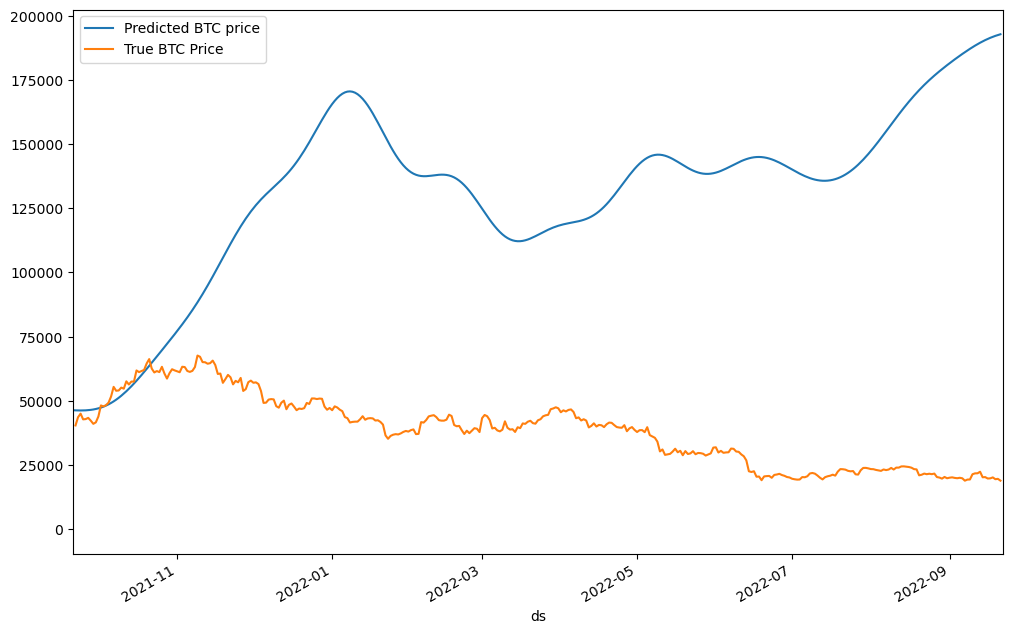

In [75]:
ax = forecast.plot(x='ds',y='yhat',label='Predicted BTC price',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True BTC Price',legend=True,ax=ax, xlim=('2021-09-21','2022-09-22'))

In [76]:
from statsmodels.tools.eval_measures import rmse

In [77]:
predictions = forecast.iloc[-365:]['yhat']

In [78]:
rmse(predictions,test['y'])

102717.43567281478

In [80]:
# very large difference as it is roughly as equal half of the mean
test.mean()

C:\Users\sagap\AppData\Local\Temp\ipykernel_5996\3796774242.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    38428.184895
dtype: float64

In [81]:
# prophet has its own diagnostics. we need to define just as done below initial, period and horizon
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [82]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 1 years
period = 1 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [83]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:prophet:Making 3 forecasts with cutoffs between 2018-09-22 00:00:00 and 2020-09-21 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use

In [84]:
# thgis is the raw dataset that is returned via the above
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,2.149469e+07,4636.236279,2695.274707,0.387135,0.163963,0.251383,0.330275
1,38 days,2.372855e+07,4871.195461,2854.545757,0.411099,0.174735,0.262869,0.302752
2,39 days,2.604467e+07,5103.398187,3014.262397,0.435078,0.178695,0.274188,0.281346
3,40 days,2.843133e+07,5332.103373,3173.889378,0.458865,0.181567,0.285172,0.262997
4,41 days,3.088860e+07,5557.751483,3334.415019,0.482537,0.181567,0.295889,0.244648
...,...,...,...,...,...,...,...,...
324,361 days,7.851523e+08,28020.568820,24186.669939,1.279738,0.873858,1.182169,0.333333
325,362 days,7.899691e+08,28106.389638,24250.397764,1.283472,0.875822,1.184871,0.333333
326,363 days,7.937980e+08,28174.420836,24293.129771,1.284445,0.883297,1.186588,0.333333
327,364 days,7.962589e+08,28218.060365,24317.619321,1.284951,0.886867,1.188043,0.333333


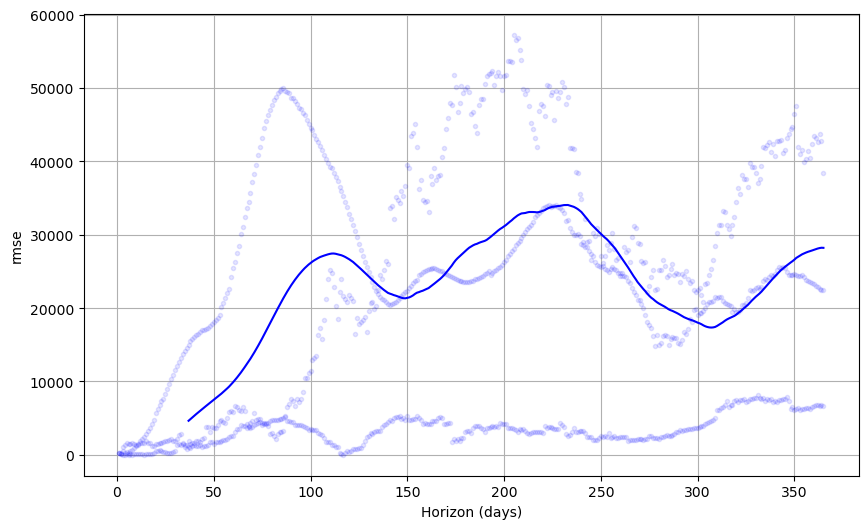

In [85]:
# we can plt a specific metric of the above which shows that mse increases over time so up to 50 days we are ok
# more than that rmse increases a lot
plot_cross_validation_metric(df_cv, metric='rmse');

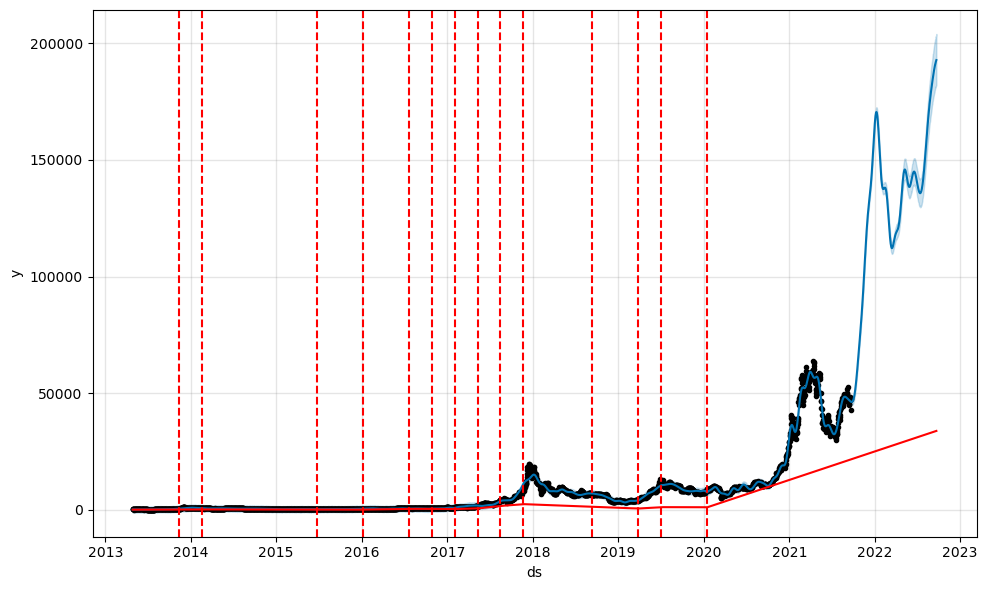

In [86]:
# to see the trend change points
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [87]:
# forecast functionality of prophet with matplotlib that can run on the m object of the prophet model
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,4-year,4-year_lower,4-year_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-04-28,34.544315,-1160.643271,1413.182492,34.544315,34.544315,-1.005924,-1.005924,-1.005924,3.557652,...,2.474030,2.474030,2.474030,-0.077698,-0.077698,-0.077698,0.0,0.0,0.0,120.007999
1,2013-04-29,34.964975,-1252.208935,1371.426389,34.964975,34.964975,-1.033512,-1.033512,-1.033512,3.557652,...,2.467458,2.467458,2.467458,-0.056682,-0.056682,-0.056682,0.0,0.0,0.0,121.239590
2,2013-04-30,35.385636,-1176.008277,1277.459219,35.385636,35.385636,-1.061688,-1.061688,-1.061688,3.557652,...,2.458129,2.458129,2.458129,-0.037835,-0.037835,-0.037835,0.0,0.0,0.0,122.368102
3,2013-05-01,35.806296,-1153.160033,1307.594608,35.806296,35.806296,-1.090417,-1.090417,-1.090417,3.557652,...,2.445613,2.445613,2.445613,-0.021622,-0.021622,-0.021622,0.0,0.0,0.0,123.374636
4,2013-05-02,36.226957,-1192.821229,1418.385267,36.226957,36.226957,-1.119663,-1.119663,-1.119663,3.557652,...,2.429532,2.429532,2.429532,-0.008457,-0.008457,-0.008457,0.0,0.0,0.0,124.241522


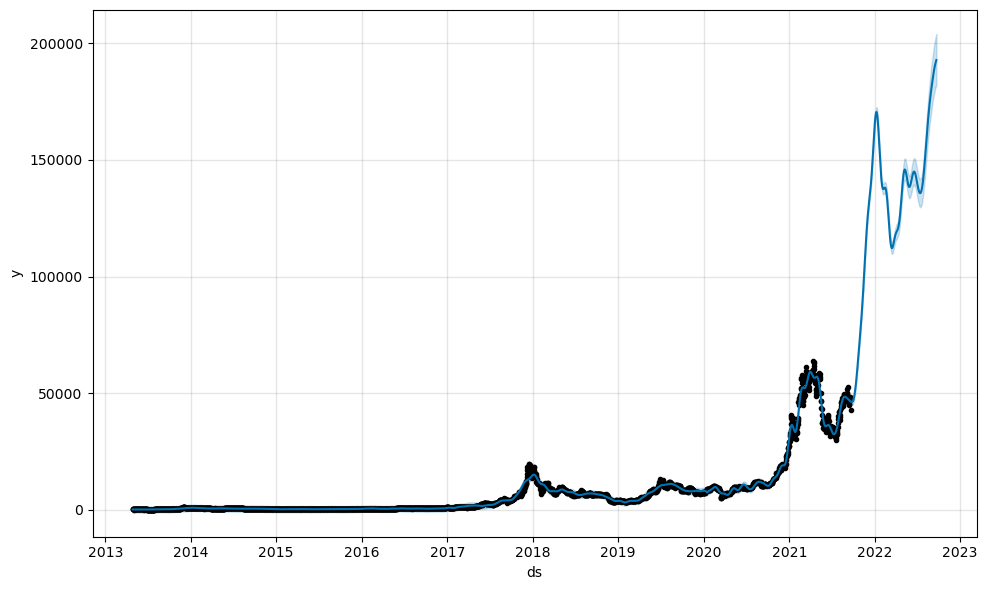

In [88]:
# we can use prophets own tools for plotting and analysis
import matplotlib.pyplot as plt
m.plot(forecast);
# plt.xlim('2014-01-01','2022-01-01') # we can use xlim to limit the data being plotted

In [89]:
# now I will include the test data in the training set and forecast 2 months in the future
m = Prophet(weekly_seasonality=False, seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1460, fourier_order=10)
m.fit(dfBTC)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=365,freq = 'D')

# to make predictions 
forecast = m.predict(future)


C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



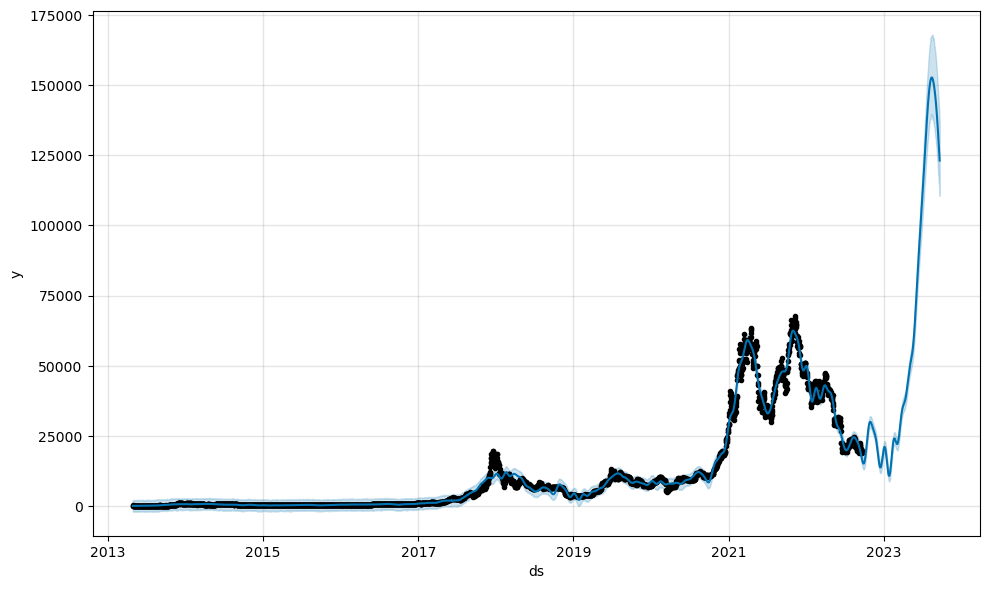

In [90]:
fig = m.plot(forecast)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



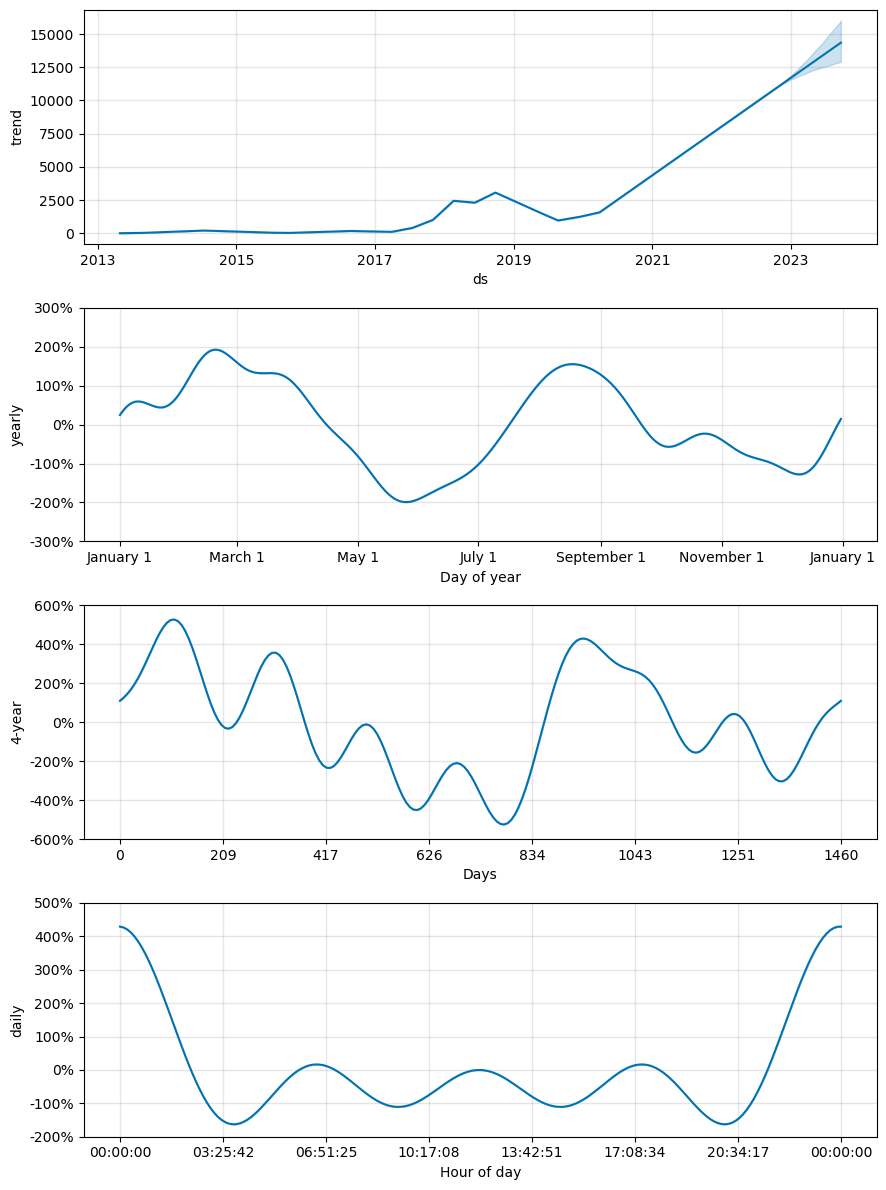

In [91]:
fig = m.plot_components(forecast)

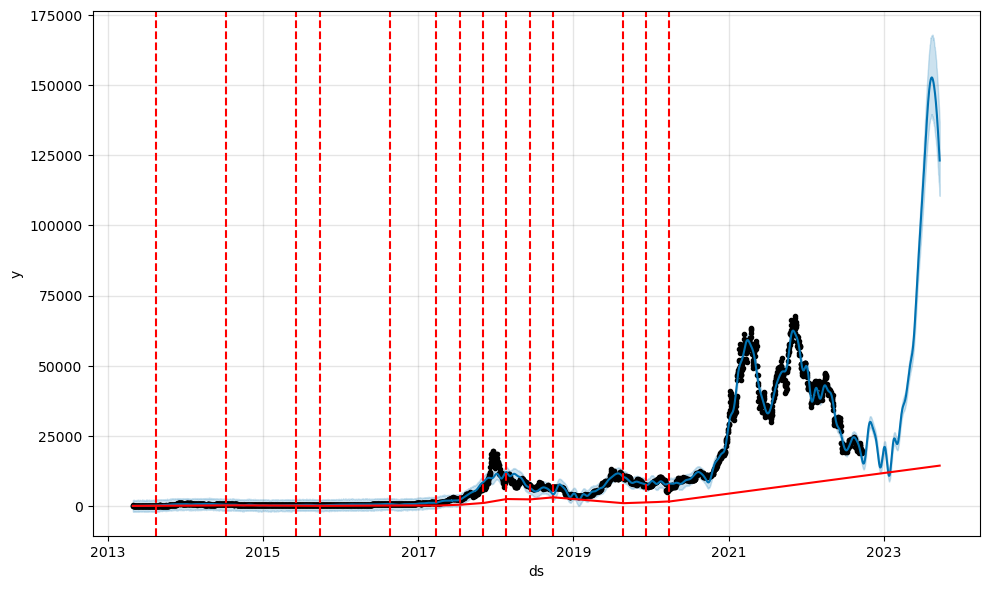

In [92]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [93]:
# final plot but with plotly
forecastPlotly = forecast.copy()
forecastPlotly['date'] = pd.to_datetime(forecastPlotly['ds'])
forecastPlotly = forecastPlotly.set_index('date')
forecastPlotly = forecastPlotly.drop(['ds'], axis=1)
forecastPlotly[['yhat_lower','yhat_upper', 'yhat']].iplot()

In [94]:
dfBTCActual['date'] = pd.to_datetime(dfBTCActual['Date'])
dfBTCActual = dfBTCActual.set_index('date')
dfBTCActual = dfBTCActual.drop(['Date'], axis=1)
result = forecastPlotly.join(dfBTCActual, how='outer')

In [95]:
result[['yhat', 'Close']].iplot()